<a href="https://colab.research.google.com/github/anjithababuraj/CognoRise/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

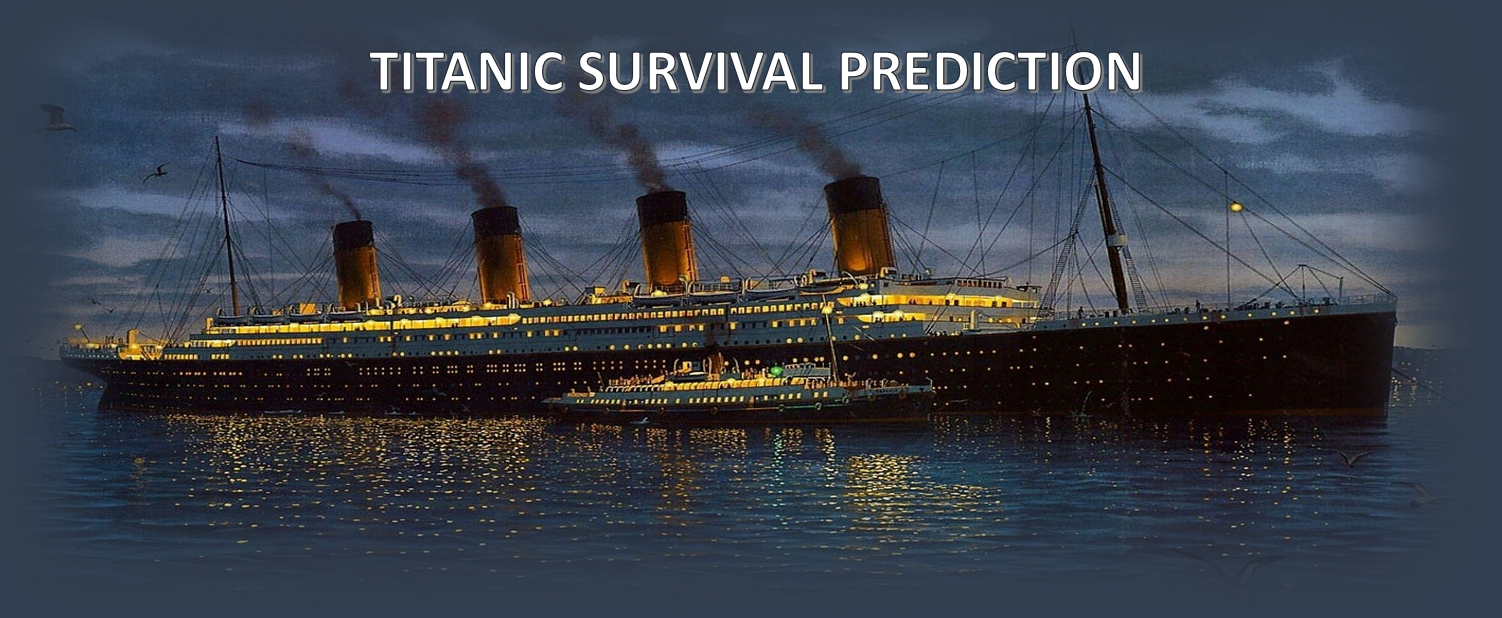

Import Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('Solarize_Light2')
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  confusion_matrix, ConfusionMatrixDisplay, classification_report

Data Loading

In [ ]:
data=pd.read_csv('/content/Titanic.csv')

In [ ]:
# no. of rows and no. of columns in the data
data.shape

(418, 12)

In [ ]:
# first 5 rows of the data
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# last 5 rows of the data
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
# information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
# to find missing values
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# fill by mean
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [ ]:
# since huge number of missing places it will affect the accuracy of prediction. So drop that column.
data.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
# fill by mean
data['Fare'].fillna(data['Fare'].mean(),inplace=True)

In [ ]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# statistical data  of the numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.50000,1204.75,1309.0000
Survived,418.0,0.363636,0.481622,0.00,0.0000,0.00000,1.00,1.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.00000,3.00,3.0000
Age,418.0,30.272590,12.634534,0.17,23.0000,30.27259,35.75,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.00000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.00000,0.00,9.0000
Fare,418.0,35.627188,55.840500,0.00,7.8958,14.45420,31.50,512.3292


Consider Object Columns

In [ ]:
# Name
data.drop(['Name'],axis=1,inplace=True)
# since it has only one value it doesn't affect the output, so can drop this column

Sex
male      266
female    152
Name: count, dtype: int64


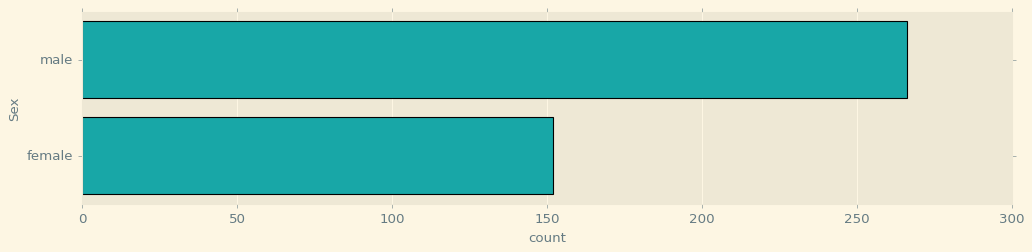

In [ ]:
# Sex
print(data['Sex'].value_counts())
plt.figure(figsize=(15,3))
sns.countplot(data['Sex'],color='c')
plt.show()

In [ ]:
# map categorical value to numeric value
data['Sex']=data['Sex'].map({'male':0,'female':1})

In [ ]:
# Ticket
data.drop(['Ticket'],axis=1,inplace=True)

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64


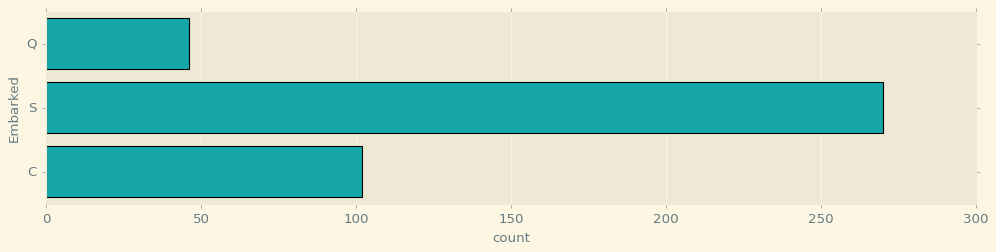

In [ ]:
# Embarked
print(data['Embarked'].value_counts())
plt.figure(figsize=(15,3))
sns.countplot(data['Embarked'],color='c')
plt.show()

In [ ]:
# map categorical value to numeric value
data['Embarked']=data['Embarked'].map({'S':0,'C':1,'Q':2})

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,0,34.5,0,0,7.8292,2
1,893,1,3,1,47.0,1,0,7.0000,0
2,894,0,2,0,62.0,0,0,9.6875,2
3,895,0,3,0,27.0,0,0,8.6625,0
4,896,1,3,1,22.0,1,1,12.2875,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int64  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


Outlier Detection and Removal

<Axes: xlabel='Age', ylabel='Survived'>

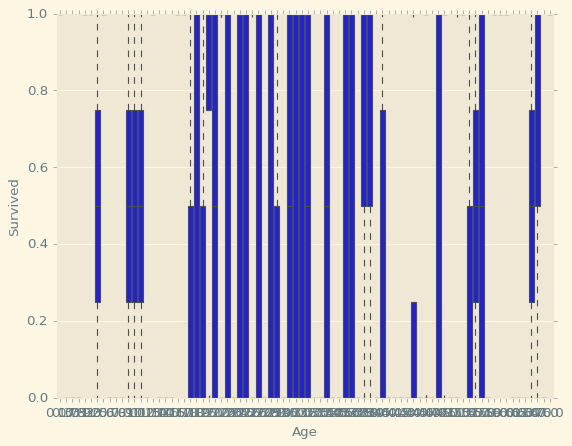

In [ ]:
sns.boxplot(x='Age',y='Survived',data=data)

<Axes: xlabel='Fare', ylabel='Survived'>

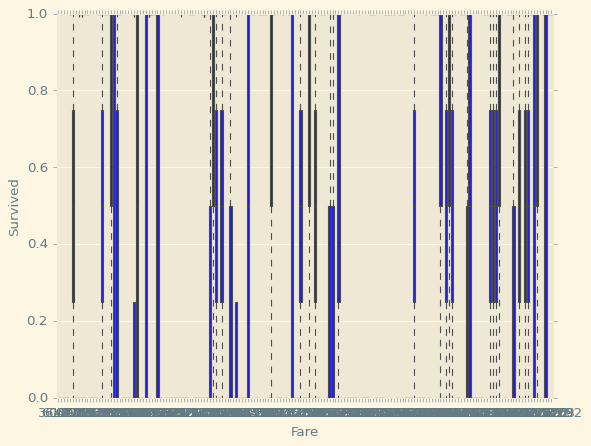

In [ ]:
sns.boxplot(x='Fare',y='Survived',data=data)

In [ ]:
# To detect and remove outliers
def outlier_det(data,i):
  Q1=np.percentile(data[i],25)
  Q3=np.percentile(data[i],75)
  lower=Q1-(1.5*(Q3-Q1))
  upper=Q3+(1.5*(Q3-Q1))
  data=data[(lower<data[i]) & (data[i]<upper)]
  return data

In [ ]:
data=outlier_det(data,'Age')
data=outlier_det(data,'Fare')

Survived
0    226
1    107
Name: count, dtype: int64


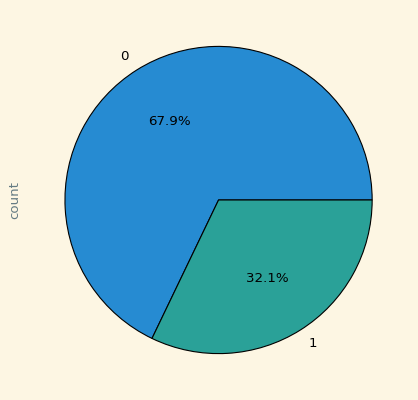

In [ ]:
print(data['Survived'].value_counts())
data['Survived'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

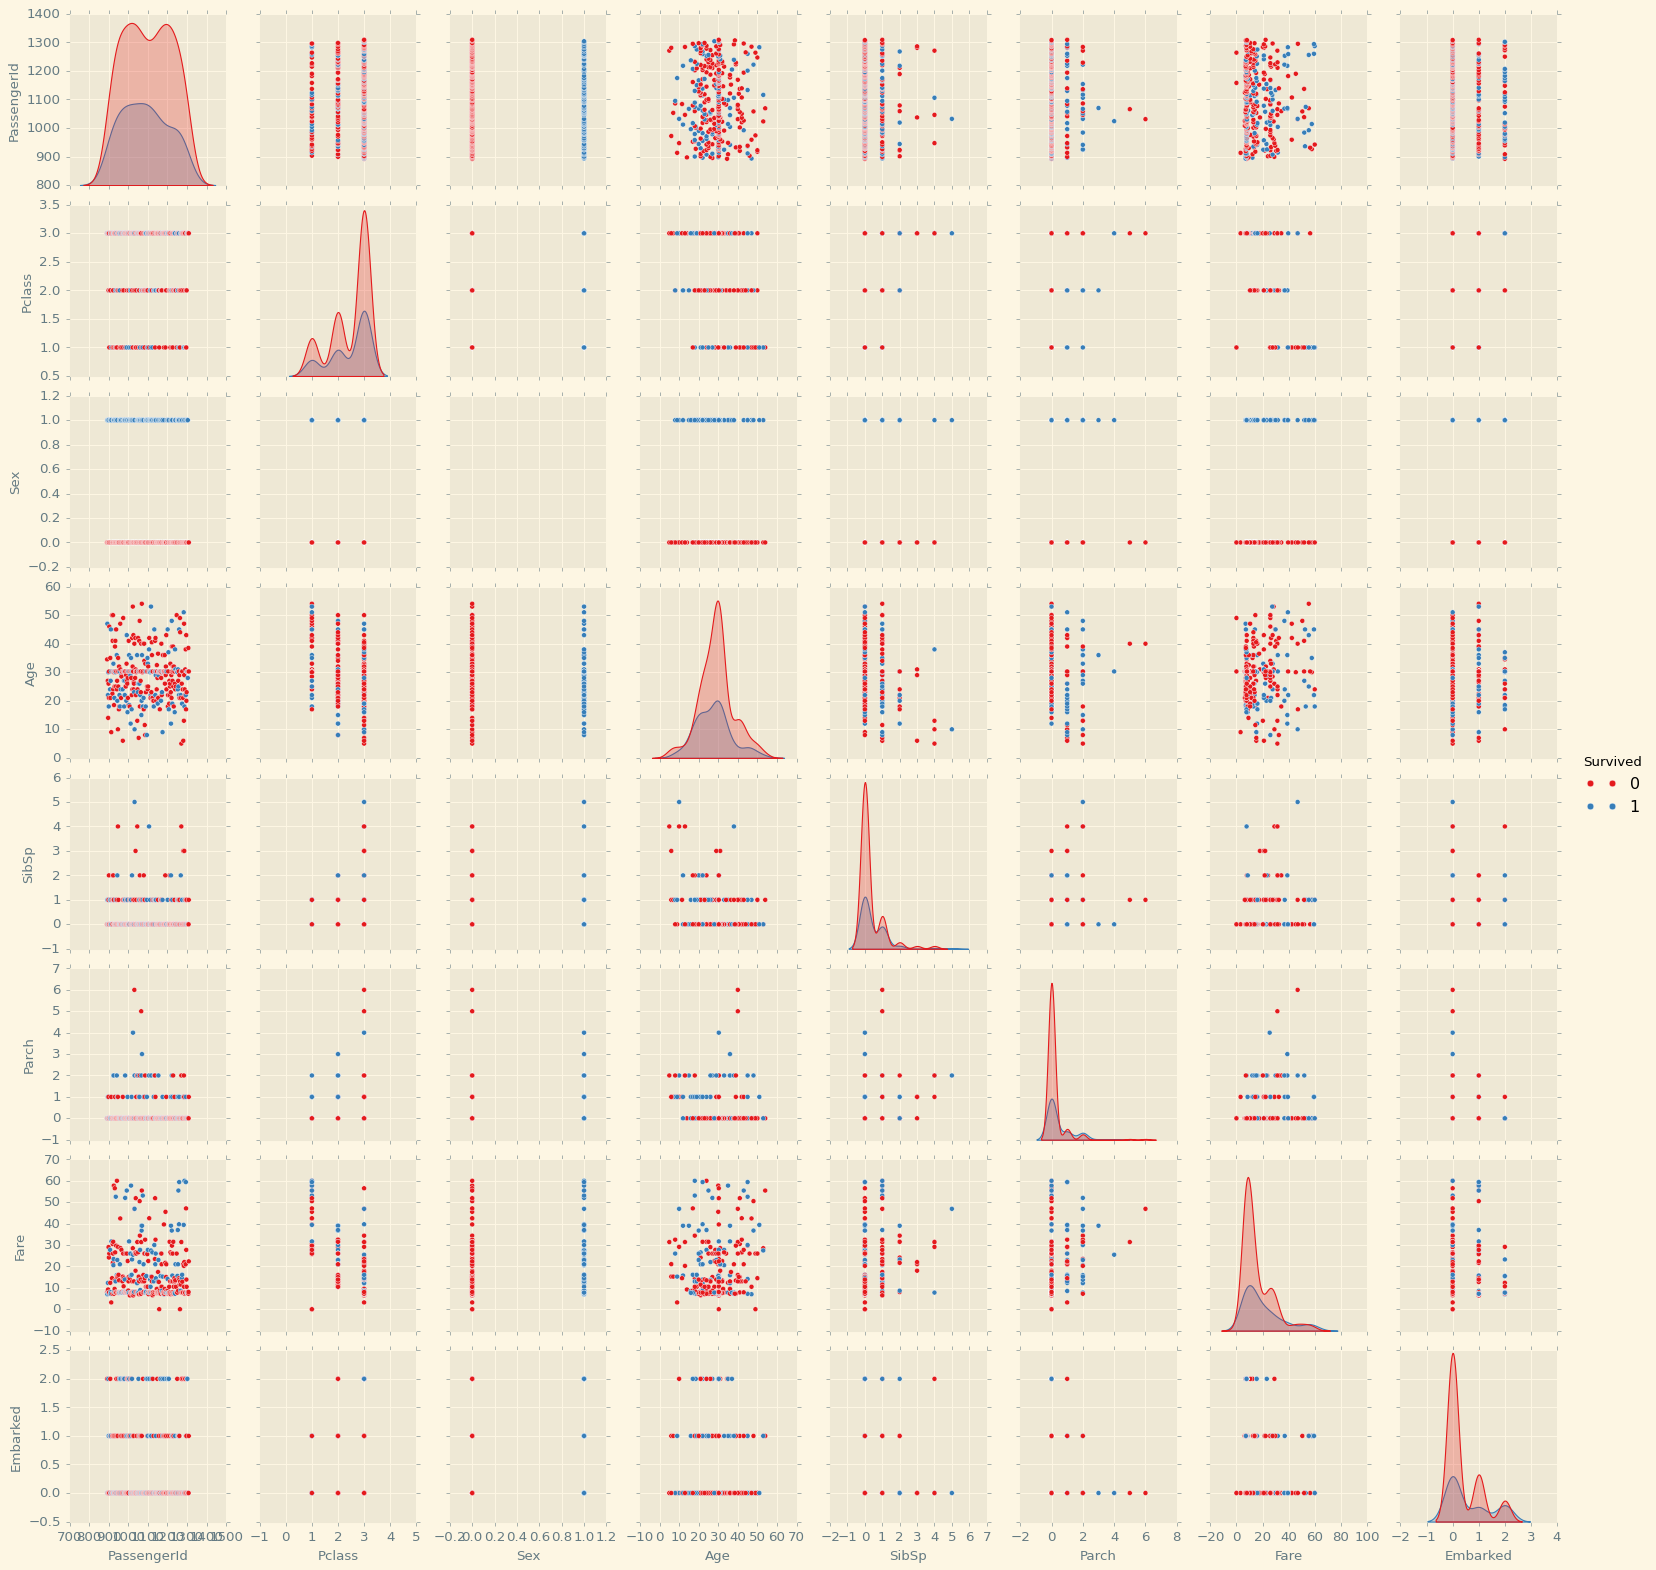

In [ ]:
sns.pairplot(data,hue='Survived',palette='Set1', diag_kind='kde')

<Axes: >

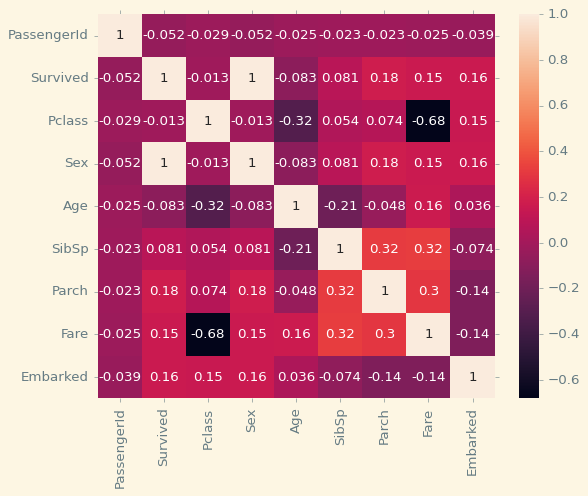

In [ ]:
sns.heatmap(data.corr(),annot=True)

In [ ]:
# Oversampling technique to balance the data
data_notsurvived = data[data['Survived'] == 0]    # majority
data_survived = data[data['Survived'] == 1]       # minority

# Upsample minority class
data_survived_upsampled = resample(data_survived,replace=True,n_samples=len(data_notsurvived),random_state=123)

DATA = pd.concat([data_notsurvived, data_survived_upsampled])

In [ ]:
DATA['Survived'].value_counts()
# data balanced

Survived
0    226
1    226
Name: count, dtype: int64

Separating x as Input and y as Output

In [ ]:
x=DATA.drop(['Survived','PassengerId'],axis=1)
y=DATA['Survived']

Splitting Data into Train and Test set

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
x_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
200,3,1,30.27259,0,0,15.5000,2
194,2,0,8.00000,0,2,32.5000,0
309,3,1,45.00000,1,0,14.1083,0
391,1,1,51.00000,0,1,39.4000,0
219,3,0,30.27259,0,0,8.0500,0


In [ ]:
x_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
4,3,1,22.00000,1,1,12.2875,0
73,1,0,28.50000,0,0,27.7208,1
49,3,1,36.00000,0,2,15.9000,0
362,2,1,31.00000,0,0,21.0000,0
286,3,0,30.27259,0,0,7.2500,0


In [ ]:
y_train.head()

200    1
194    0
309    1
391    1
219    0
Name: Survived, dtype: int64

In [ ]:
y_test.head()

4      1
73     0
49     1
362    1
286    0
Name: Survived, dtype: int64

Normalization

In [ ]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

Logistic Regression Model creation

In [ ]:
model=LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

Logistic Regression Model Performance Evaluation

[[71  0]
 [ 0 65]]


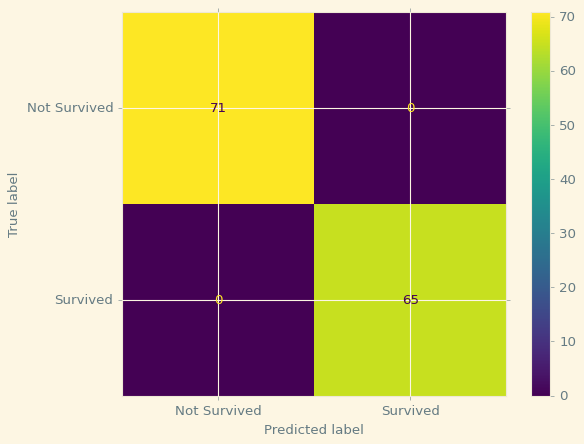

In [ ]:
mat=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(mat,display_labels=['Not Survived','Survived'])
print(mat)
dis.plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        65

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136



Random Forest Model creation

In [ ]:
RF_model=RandomForestClassifier()
RF_model.fit(x_train,y_train)
y_pred=model.predict(x_test)

Random Forest Model Performance Evaluation

[[71  0]
 [ 0 65]]


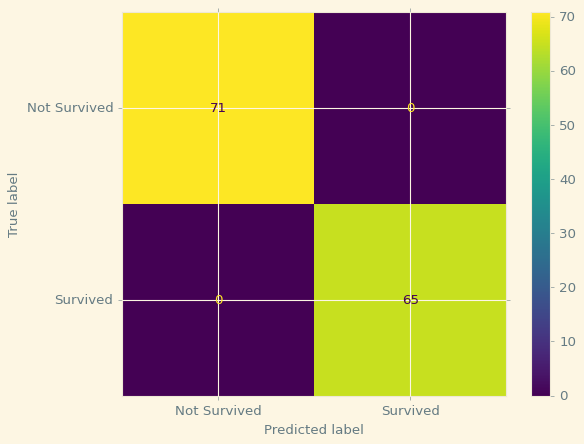

In [ ]:
mat=confusion_matrix(y_test,y_pred)
dis=ConfusionMatrixDisplay(mat,display_labels=['Not Survived','Survived'])
print(mat)
dis.plot()

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        65

    accuracy                           1.00       136
   macro avg       1.00      1.00      1.00       136
weighted avg       1.00      1.00      1.00       136

